# Simple Hybrid Example -Tau Hybrid Solver
***
The hybrid solver is capable of solving models which include both discrete and continuous species.  In order for a species to be considered continuously, it must be included in a rate rule, along with it's rate of change.  This species can then be considered in reactions by explicitly declaring the species as part of the reaction's propensity function.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import gillespy2

***
## Build the Simple Hybrid Model
***
Model requires species, parameters, and reactions.  rate_rules can also be added to model a species continuously

In [3]:
def build_simple_hybrid_model(parameter_values=None, init_v=1):
    # Initialize Model
    model = gillespy2.Model(name="Simple_Hybrid_Model")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=0)
    '''
    Setting the continuous species.mode to "continuous" will prevent this species from being
    considered discretely, and allows it to be modeled continuously with a rate rule.
    '''
    V = gillespy2.Species(name='V', initial_value=init_v, mode='continuous')

    # Add Variables to Model
    model.add_species([A, V])

    # Define Parameters
    rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
    rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
    
    # Add Parameters to Model
    model.add_parameter([rate1, rate2])

    # Define Reactions
    '''
    Because we want to use our continuous species "V" in the propensity function for r1, we
    associate a custom propensity function, rather than a simple rate. Here we can simply
    use the rate times our continuous species "V".
    '''
    r1 = gillespy2.Reaction(name="r1", reactants={}, products={'A': 1}, propensity_function="rate1 * V")
    r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={}, rate='rate2')

    # Add Reactions to Model
    model.add_reaction([r1, r2])
    
    # Define Rate Rules
    '''
    We create a rate rule with two arguments.  The first is the species we intend to associate
    the rate rule with.  In this case, we choose our previously declared continuous species
    "V" and give it the rate function of cos(t).
    '''
    rate_rule1 = gillespy2.RateRule(variable='V', formula="cos(t)")
    
    # Add Rate Rules to Model
    model.add_rate_rule(rate_rule1)

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_simple_hybrid_model()

***
## Run the Simulations
***

In [5]:
%time results = model.run()

CPU times: user 21.2 ms, sys: 91.6 ms, total: 113 ms
Wall time: 5.88 s


***
## Visualizations
***

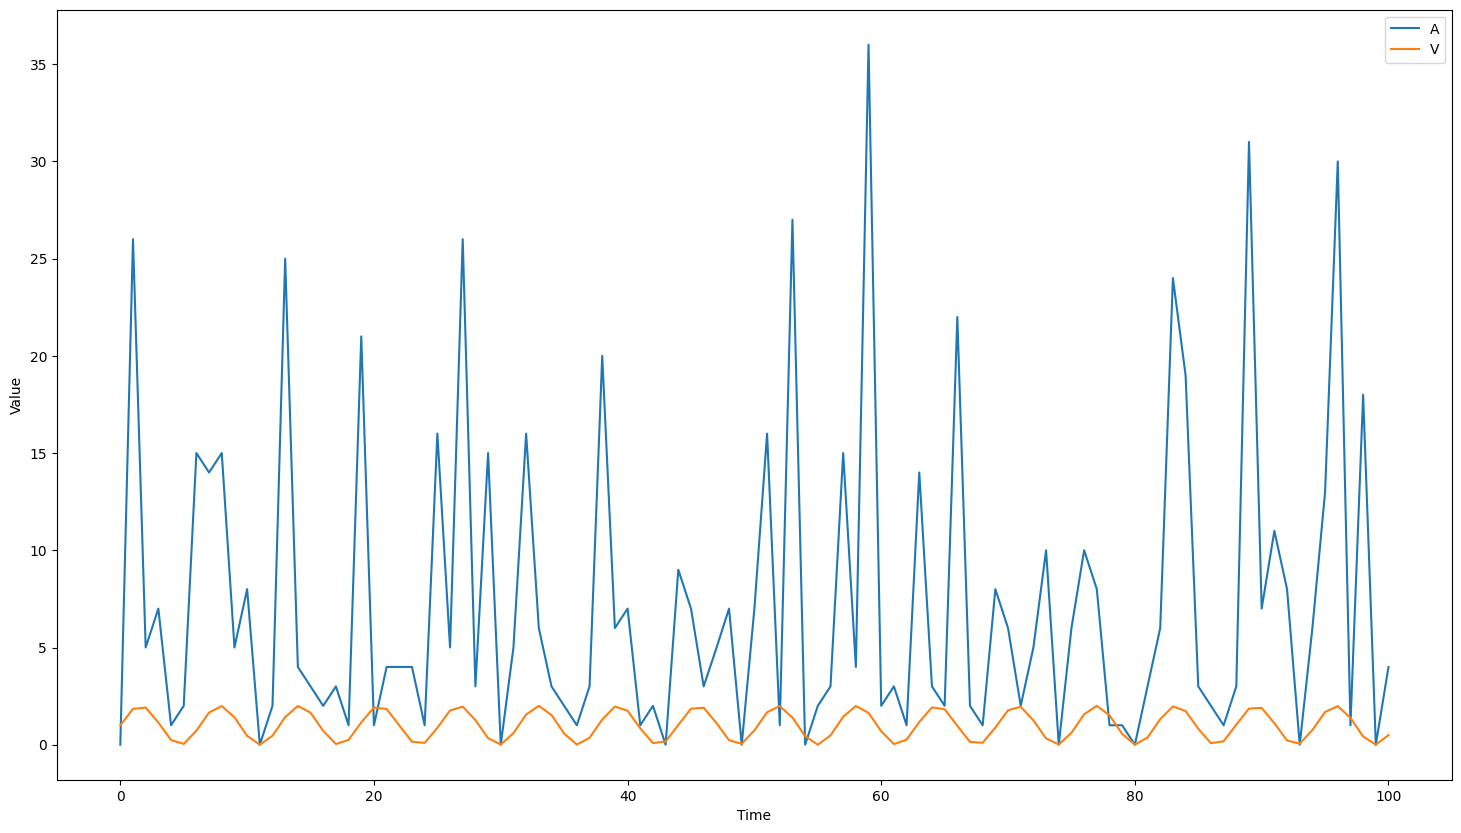

In [6]:
results.plot()